<a href="https://colab.research.google.com/github/harisingh294/AI_Content/blob/main/AStar_AI_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

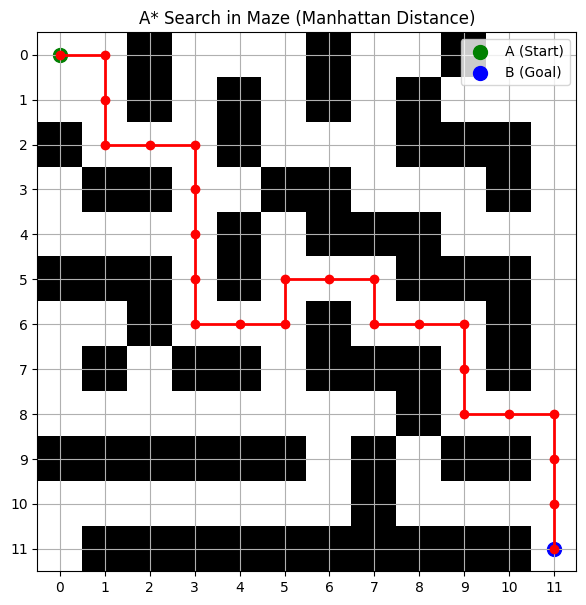

Path found: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (6, 4), (6, 5), (5, 5), (5, 6), (5, 7), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (8, 10), (8, 11), (9, 11), (10, 11), (11, 11)]


In [1]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# Manhattan distance heuristic
# -------------------------------
def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# -------------------------------
# A* Search Implementation
# -------------------------------
def astar(maze, start, goal):
    rows, cols = maze.shape
    open_list = []
    heapq.heappush(open_list, (0, start))

    came_from = {}
    g_score = {start: 0}
    f_score = {start: manhattan(start, goal)}

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            # Reconstruct path
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]  # reverse

        # 4-direction moves
        neighbors = [(0,1), (1,0), (0,-1), (-1,0)]
        for dx, dy in neighbors:
            neighbor = (current[0] + dx, current[1] + dy)

            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                if maze[neighbor] == 1:  # wall
                    continue

                tentative_g = g_score[current] + 1
                if neighbor not in g_score or tentative_g < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score[neighbor] = tentative_g + manhattan(neighbor, goal)
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return None  # no path found

# -------------------------------
# Convert maze with A and B
# -------------------------------
maze5 = [
    ['A', 0,  1,  0,  0,  0, 1, 0, 0, 1, 0, 0],
    [0,   0,  1,  0,  1,  0, 1, 0, 1, 0, 0, 0],
    [1,   0,  0,  0,  1,  0, 0, 0, 1, 1, 1, 0],
    [0,   1,  1,  0,  0,  1, 1, 0, 0, 0, 1, 0],
    [0,   0,  0,  0,  1,  0, 1, 1, 1, 0, 0, 0],
    [1,   1,  1,  0,  1,  0, 0, 0, 1, 1, 1, 0],
    [0,   0,  1,  0,  0,  0, 1, 0, 0, 0, 1, 0],
    [0,   1,  0,  1,  1,  0, 1, 1, 1, 0, 1, 0],
    [0,   0,  0,  0,  0,  0, 0, 0, 1, 0, 0, 0],
    [1,   1,  1,  1,  1,  1, 0, 1, 0, 1, 1, 0],
    [0,   0,  0,  0,  0,  0, 0, 1, 0, 0, 0, 0],
    [0,   1,  1,  1,  1,  1, 1, 1, 1, 1, 1,'B'],
]

# Convert to numpy and detect start/goal
maze_np = np.zeros((len(maze5), len(maze5[0])), dtype=int)
start, goal = None, None

for i in range(len(maze5)):
    for j in range(len(maze5[0])):
        if maze5[i][j] == 'A':
            start = (i, j)
            maze_np[i, j] = 0
        elif maze5[i][j] == 'B':
            goal = (i, j)
            maze_np[i, j] = 0
        else:
            maze_np[i, j] = maze5[i][j]

# -------------------------------
# Run A*
# -------------------------------
path = astar(maze_np, start, goal)

# -------------------------------
# Visualization
# -------------------------------
plt.figure(figsize=(7,7))
plt.imshow(maze_np, cmap="binary")  # 1=black (wall), 0=white (free)
plt.xticks(range(maze_np.shape[1]))
plt.yticks(range(maze_np.shape[0]))
plt.grid(True)

if path:
    px, py = zip(*path)
    plt.plot(py, px, marker="o", color="red", linewidth=2)

plt.scatter(start[1], start[0], color="green", s=100, label="A (Start)")
plt.scatter(goal[1], goal[0], color="blue", s=100, label="B (Goal)")
plt.legend()
plt.title("A* Search in Maze (Manhattan Distance)")
plt.show()

print("Path found:", path)
